In [1]:
import os
import scipy.io
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
import pandas as pd
from IPython.display import clear_output

In [2]:
'读取某工况下某个轴承的某个采样数据csv文件，并观察'
d = pd.read_csv('F:\\Data\\phm-ieee-2012-data-challenge-dataset-master\\Learning_set\\Bearing1_1\\acc_00001.csv',
            header=None,sep=',')
d

,0,1,2,3,4,5
0,9,39,39,65664.0,0.552,-0.146
1,9,39,39,65703.0,0.501,-0.480
2,9,39,39,65742.0,0.138,0.435
3,9,39,39,65781.0,-0.423,0.240
4,9,39,39,65820.0,-0.802,0.020
...,...,...,...,...,...,...
2555,9,39,39,165470.0,0.044,-0.094
2556,9,39,39,165510.0,-0.456,0.486
2557,9,39,39,165550.0,-0.885,-0.154
2558,9,39,39,165580.0,-0.230,-0.762


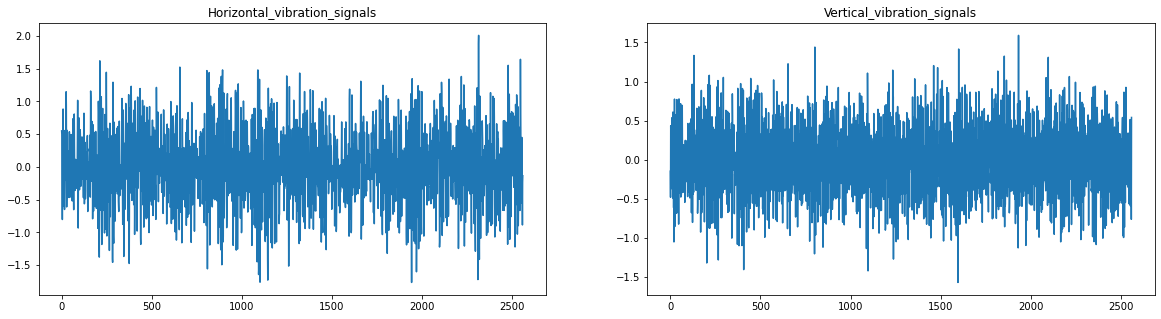

In [3]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(d.iloc[:,-2])
plt.title('Horizontal_vibration_signals')
plt.subplot(122)
plt.plot(d.iloc[:,-1])
plt.title('Vertical_vibration_signals')
plt.show()

In [4]:
def get_a_bearings_data(folder):
    ''' 获取某个工况下某个轴承的全部n个csv文件中的数据，返回numpy数组
    dp:bearings_x_x的folder
    return:folder下n个csv文件中的数据，shape:[n*32768,2]=[文件个数*采样点数，通道数]'''
    names = os.listdir(folder)
    is_acc = ['acc' in name for name in names] 
    names = names[:sum(is_acc)]
    files = [os.path.join(folder,f) for f in names]
    # Bearing1_4 的csv文件的分隔符是分号：';'
    print(pd.read_csv(files[0],header=None).shape)
    sep = ';' if pd.read_csv(files[0],header=None).shape[-1]==1 else ','
    h = [pd.read_csv(f,header=None,sep=sep).iloc[:,-2] for f in files]
    v = [pd.read_csv(f,header=None,sep=sep).iloc[:,-1] for f in files]
    H = np.concatenate(h)
    V = np.concatenate(v)
    print(H.shape,V.shape)
    return np.stack([H,V],axis=-1)

data = get_a_bearings_data('F:\\Data\\phm-ieee-2012-data-challenge-dataset-master\\Learning_set\\Bearing1_1')
data = get_a_bearings_data('F:\\Data\\phm-ieee-2012-data-challenge-dataset-master\\Full_Test_Set\\Bearing1_4')
data.shape

(2560, 6)
(7175680,) (7175680,)
(2560, 1)
(3655680,) (3655680,)


(3655680, 2)

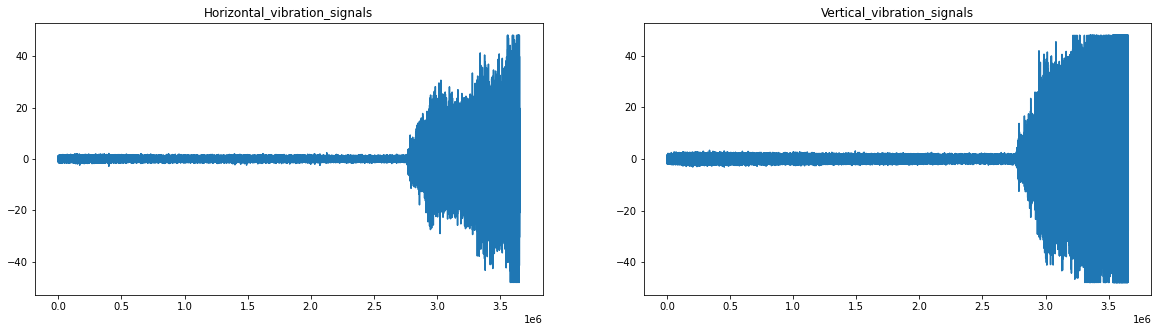

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(data[:,0])
plt.title('Horizontal_vibration_signals')
plt.subplot(122)
plt.plot(data[:,1])
plt.title('Vertical_vibration_signals')
plt.show()

In [6]:
p = 'F:\\Data\\phm-ieee-2012-data-challenge-dataset-master'

for i in ['Learning_set','Full_Test_Set']:
    pp = os.path.join(p,i)
    for j in os.listdir(pp):
        ppp = os.path.join(pp,j)
        print(ppp)
        
        
        data = get_a_bearings_data(ppp)
        save_name = p + '\\mat\\' + j+'.mat'
        print(save_name)
        scipy.io.savemat(save_name,{'h':data[:,0], 'v':data[:,1]}) # 写入mat文件        
    print('\n')

F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_1
(2560, 6)
(7175680,) (7175680,)
F:\Data\phm-ieee-2012-data-challenge-dataset-master\mat\Bearing1_1.mat
F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing1_2
(2560, 6)
(2229760,) (2229760,)
F:\Data\phm-ieee-2012-data-challenge-dataset-master\mat\Bearing1_2.mat
F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_1
(2560, 6)
(2332160,) (2332160,)
F:\Data\phm-ieee-2012-data-challenge-dataset-master\mat\Bearing2_1.mat
F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing2_2
(2560, 6)
(2040320,) (2040320,)
F:\Data\phm-ieee-2012-data-challenge-dataset-master\mat\Bearing2_2.mat
F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_1
(2560, 6)
(1318400,) (1318400,)
F:\Data\phm-ieee-2012-data-challenge-dataset-master\mat\Bearing3_1.mat
F:\Data\phm-ieee-2012-data-challenge-dataset-master\Learning_set\Bearing3_2
(2560, 6)
(4190720,) (4190720